AGGREGATING DATA SUMMARY STATISTIC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('./dataset/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data = titanic['Age'].describe()
data

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [4]:
titanic['Age'].mean()

np.float64(29.69911764705882)

In [5]:
titanic['Age'].median()

28.0

In [11]:
titanic['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [12]:
titanic['Age'].max()

80.0

In [13]:
titanic['Age'].min()

0.42

In [14]:
def pct30(column):return column.quantile(0.3)

In [15]:
titanic['Age'].agg(pct30)

np.float64(22.0)

In [16]:
titanic['Fare'].agg(pct30)

np.float64(8.05)

In [17]:
titanic['Age'].agg(lambda col:col.quantile(0.3))

np.float64(22.0)

In [20]:
titanic[['Age', 'Fare']].agg(lambda col:col.quantile(0.3))

Age     22.00
Fare     8.05
dtype: float64

CUMULATIVE STATISTICS

In [22]:
pd.DataFrame(titanic['Age'].cumsum().head())

,Age
0,22.0
1,60.0
2,86.0
3,121.0
4,156.0


In [23]:
pd.DataFrame(titanic['Age'].cummin().head())

,Age
0,22.0
1,22.0
2,22.0
3,22.0
4,22.0


In [24]:
pd.DataFrame(titanic['Age'].cummax().head())

,Age
0,22.0
1,38.0
2,38.0
3,38.0
4,38.0


##### Drop Duplicate Rows

In [25]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [26]:
titanic.drop_duplicates(subset='Pclass')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
titanic.drop_duplicates(subset=['Pclass', 'SibSp'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S


In [28]:
pd.DataFrame(titanic['Age'].value_counts())

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


In [29]:
pd.DataFrame(titanic['Age'].value_counts(sort=False))

,count
Age,
22.00,27
38.00,11
26.00,18
35.00,18
54.00,8
...,...
0.67,1
30.50,2
0.42,1


In [32]:
pd.DataFrame(titanic['Age'].value_counts(normalize=True))

,proportion
Age,
24.00,0.042017
22.00,0.037815
18.00,0.036415
28.00,0.035014
30.00,0.035014
...,...
24.50,0.001401
0.67,0.001401
0.42,0.001401


In [34]:
titanic[titanic['Sex'] == 'male']['Age'].mean()

np.float64(30.72664459161148)

In [35]:
titanic[titanic['Sex'] == 'female']['Age'].mean()

np.float64(27.915708812260537)

In [36]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [37]:
pd.DataFrame(titanic.groupby('Sex')['Age'].mean())

,Age
Sex,
female,27.915709
male,30.726645


In [39]:
titanic.groupby(['Survived', 'Sex'])['Age'].count()

Survived  Sex   
0         female     64
          male      360
1         female    197
          male       93
Name: Age, dtype: int64

In [40]:
titanic.groupby('Sex')['Age'].agg(['count', 'min', 'max'])

,count,min,max
Sex,,,
female,261,0.75,63.0
male,453,0.42,80.0


In [47]:
titanic.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [49]:
titanic.groupby(['Survived', 'Sex'])[['Age', 'SibSp']].mean()

Age     SibSp
Survived Sex                        
0        female  25.046875  1.209877
         male    31.618056  0.440171
1        female  28.847716  0.515021
         male    27.276022  0.385321

In [51]:
titanic.groupby(['Survived', 'Sex'])[['Age', 'SibSp']].agg(['count', 'min', 'max'])

Age             SibSp        
                count   min   max count min max
Survived Sex                                   
0        female    64  2.00  57.0    81   0   8
         male     360  1.00  74.0   468   0   8
1        female   197  0.75  63.0   233   0   4
         male      93  0.42  80.0   109   0   4

### PIVOT TABLE

In [52]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [54]:
titanic.pivot_table(values='Age', index='Sex')  # by default it gives mean

,Age
Sex,
female,27.915709
male,30.726645


In [55]:
titanic.pivot_table(values='Age', index='Sex', aggfunc='count')

,Age
Sex,
female,261
male,453


In [56]:
titanic.pivot_table(values='Age', index='Sex', aggfunc='median')

,Age
Sex,
female,27.0
male,29.0


In [60]:
from scipy import stats as st

In [78]:
titanic.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
titanic.pivot_table(values='Age', index='Sex', aggfunc=st.mode)

,Age
Sex,
female,"(nan, 53)"
male,"(nan, 124)"


In [66]:
titanic.pivot_table(values='Age', index='Sex', columns='Survived')

Survived,0,1
Sex,,
female,25.046875,28.847716
male,31.618056,27.276022


In [68]:
titanic.pivot_table(values='Age', index='Sex', columns='Survived', fill_value=0 , aggfunc=st.mode)

Survived,0,1
Sex,,
female,"(nan, 17)","(nan, 36)"
male,"(nan, 108)","(nan, 16)"


In [83]:
titanic.pivot_table(values='Age', index='Sex', columns='Survived', fill_value=0 , aggfunc=lambda x: st.mode(x.dropna(), nan_policy='omit').mode.item())

Survived,0,1
Sex,,
female,18.0,24.0
male,19.0,32.0


In [70]:
titanic.pivot_table(values='Age', index='Sex', columns='Survived', fill_value=0 , margins=True, margins_name='mean')

Survived,0,1,mean
Sex,,,
female,25.046875,28.847716,27.915709
male,31.618056,27.276022,30.726645
mean,30.626179,28.343690,29.699118


In [ ]:
titanic.pivot_table(values='Age', index='Sex', columns='Survived', fill_value=0 , margins=True, margins_name='mean')

In [73]:
titanic_index = titanic.set_index('Name')

In [76]:
titanic_index.reset_index(drop=True).head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<function matplotlib.pyplot.show(close=None, block=None)>

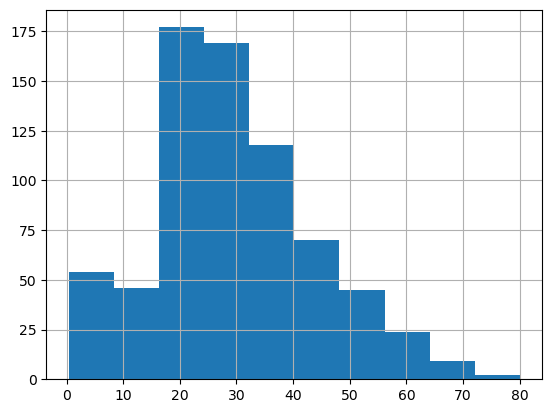

In [77]:
titanic['Age'].hist()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

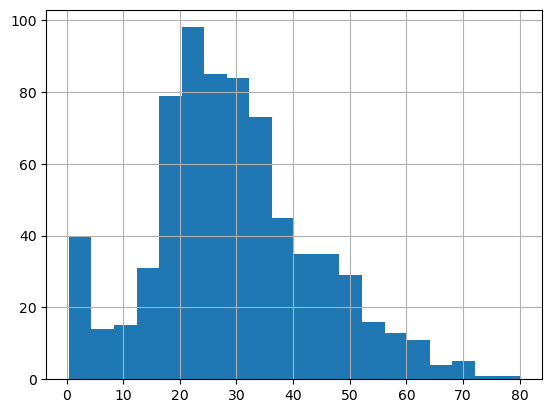

In [82]:
titanic['Age'].hist(bins=20)
plt.show

In [89]:
gender_count = titanic.groupby('Sex')['Age'].count()

<Axes: xlabel='Sex'>

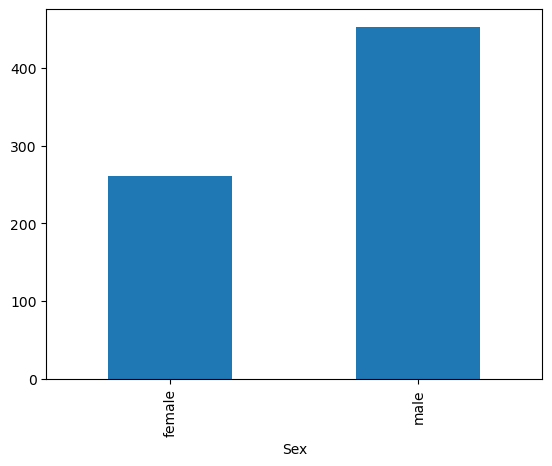

In [92]:
gender_count.plot(kind='bar')

In [101]:
ten_ages = titanic['Age'].iloc[10: 20]
ten_ages

10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

<Axes: >

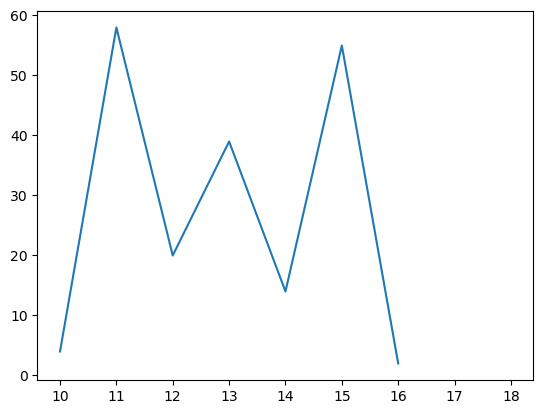

In [103]:
ten_ages.plot(x= ten_ages.index , y= ten_ages.values , kind='line')

<Axes: >

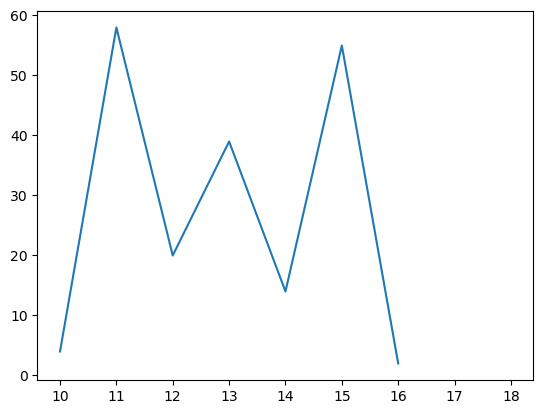

In [106]:
ten_ages.plot(x= ten_ages.index , y= ten_ages.values , kind='line',)

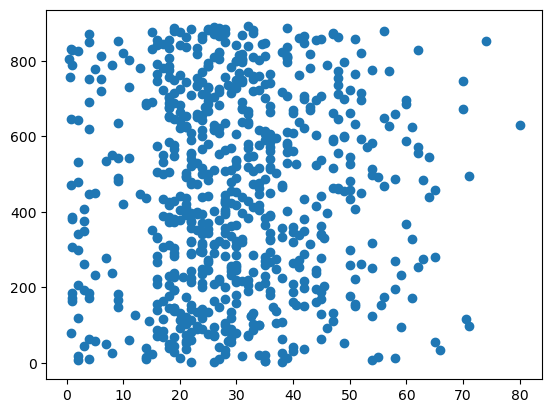

In [109]:
x = titanic['Age']
y= titanic['PassengerId']
plt.scatter(x, y)

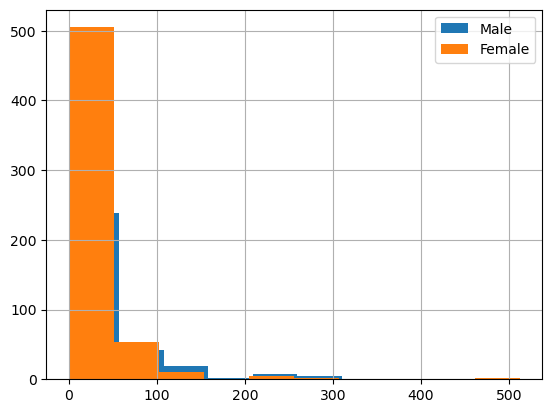

In [120]:
titanic.groupby('Sex')['Fare'].hist()
plt.legend(['Male', 'Female'])
plt.show()

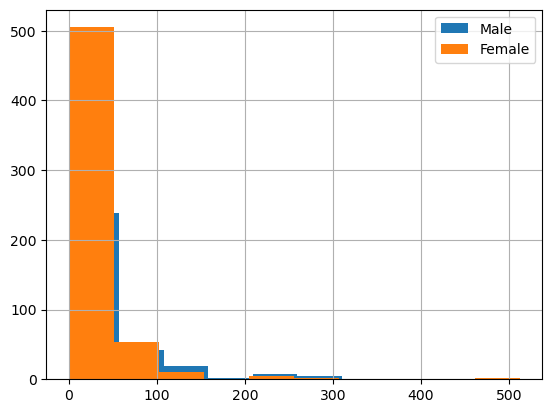

In [117]:
titanic[titanic['Sex'] == 'female']['Fare'].hist()
titanic[titanic['Sex'] == 'male']['Fare'].hist()
plt.legend(['Male', 'Female'])
plt.show()

In [121]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

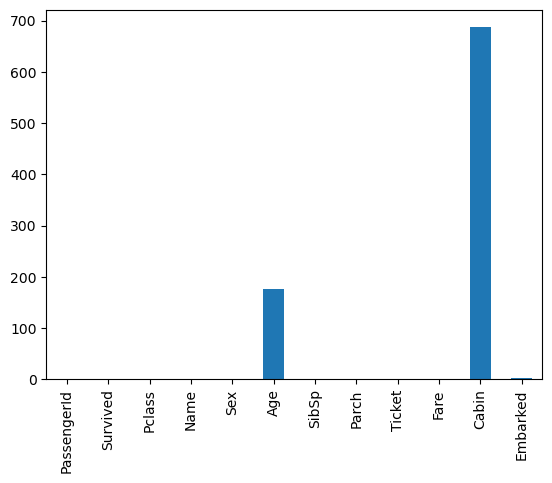

In [125]:
titanic.isna().sum().plot(kind='bar')
plt.show()

In [126]:
titanic.dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [130]:
titanic.dropna(inplace=True)

In [131]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [132]:
titanic.dropna().shape

(183, 12)

In [134]:
dogs_data = pd.read_csv('./dataset/dogs.csv')
dogs_data

,Name,Breed,Color,Height(cm),Weight(kg),Date of Birth
0,Bella,Labrador,Brown,56,25,2013-07-01
1,Charlie,Poodle,Black,43,23,2016-09-16
2,Lucy,Chow,Brown,46,22,2014-08-25
3,Cooper,Schnauzer,Gray,49,17,2011-12-11
4,Max,Labrador,Black,59,29,2017-01-20
5,Stella,Chihuahua,Tan,18,2,2015-04-20
6,Bernie,St. Bernard,White,77,74,2018-02-2


In [ ]:
dogs_data.groupby()